## Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
Edición 2022

### **Entrega - AutoML**


Integrantes

*   Flores Diego
*   Quiros Agustina

El propósito de este notebook es presentar las funcionalidades de esta librería:
https://scikit-optimize.github.io/stable/

# Sección 1

## Instalación:

In [ ]:
#pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.8 MB/s 


## Imports

In [ ]:
import numpy as np
np.random.seed(77)
import matplotlib.pyplot as plt

import itertools
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_digits
from skopt import BayesSearchCV

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#Libreria a importar
import skopt

## Dataset

El tema de mi mentoria de la diplomatura fue el armado de una cartera de criptomonedas, y para llevarla a cabo, se utilizaron modelos de aprendizaje no automático, es por eso que no podré utilizarlos para realizar esta entrega. En su lugar voy a utilizar el daaset de Digits, que se compone de 1797 ejemplos de dígitos escritos a mano de 8x8 pixeles. La elección de este dataset también es para acortar tiempos, ya que es un dataset relativamente pequeño y podremos probar sklearn-optimize en poco tiempo.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

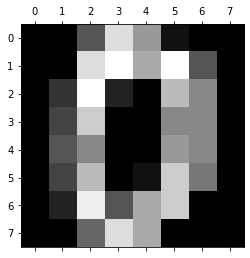

In [ ]:
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

## Optimización Bayesiana

### Primer Modelo - SVC

Divido el dataset en train y test, para luego hacer el entrenamiento y predicción.

In [ ]:
X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=.2, random_state=77)

La función de optimización bayesiana permite buscar el mínimo de la función de pérdida.

In [ ]:
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'degree': (1, 8),
        'kernel': ['linear', 'poly', 'rbf'],
    },
    n_iter=32,
    cv=3
)

Voy a controlar el tiempo que demora el optimizador en correr, para luego compararlo con un GridSearchCV.

In [ ]:
%%time 

opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9874739039665971
Score test: 0.9972222222222222
CPU times: user 1min 12s, sys: 1.21 s, total: 1min 13s
Wall time: 21.4 s


Ahora creamos un modelo de GridSearchCV para obtener un segundo resultado, usando los mismos rangos de hiperparámetros y luego compararlo con la optimización Bayesiana.

In [ ]:
opt = GridSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),
        'degree': (1, 8),
        'kernel': ['linear', 'poly', 'rbf'],
    },
    cv=3
)

In [ ]:
%%time 

opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9874739039665971
Score test: 0.9972222222222222
CPU times: user 2.7 s, sys: 3.96 ms, total: 2.7 s
Wall time: 2.43 s


Podemos ver que la optimización Bayesiana en este caso resultó mucho más lenta en comparación con el GridSearchCV y los resultados fueron iguales, por lo que en este tipo de modelos simples, no conviene utilizarlo.

### Segundo Modelo - RandomForest

Para el segundo ejemplo utilizo un modelo de Random Forest para aumenar la cantidad de hiperparámetros a optimizar y luego realizar la misma evaluación anterior.

Mismo proceso, comenzamos con un GridSearchCV con una serie de hiperparámetros y rangos, para tener como modelo baseline y luego compararlo con la optimización Bayesiana.

In [ ]:
X, y = load_digits(n_class=10, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=.2, random_state=77)

In [ ]:
opt = GridSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators' : [10, 20, 30, 40, 50, 60, 80, 90, 100],
        'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
        'min_samples_split' : [5, 10, 20, 50, 100],
        'random_state' : [0],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion' :['gini', 'entropy']
    },
    cv=5
)

In [ ]:
%%time
opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9756460511033682
Score test: 0.9722222222222222
CPU times: user 17min 53s, sys: 2.91 s, total: 17min 56s
Wall time: 17min 56s


Ahora de nuevo, instancio el modelo de optimización Bayesiana para compararlo.

In [ ]:
opt = BayesSearchCV(
    RandomForestClassifier(),
    {
        'n_estimators' : [10, 20, 30, 40, 50, 60, 80, 90, 100],
        'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
        'min_samples_split' : [5, 10, 20, 50, 100],
        'random_state' : [0],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion' :['gini', 'entropy']
    },
    n_iter=100,
    cv=5
)

In [ ]:
%%time

opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9756460511033682
Score test: 0.9722222222222222
CPU times: user 15min 56s, sys: 20.6 s, total: 16min 16s
Wall time: 5min 26s


# Sección 2

En esta sección utilizaremos el Dataset correspondiente a la **Mentoría Churn Prediction**, el objetivo de la mentoría fue predecir la fuga de clientes de una plataforma musical. 

El dataset contiene datos sobre información a nivel usuario, información específica del uso de la plataforma, información a nivel canción, el mismo ya se encuentra curado al ser resultado de distintas tranformaciones aplicadas a lo largo del cuatrimestre.

In [ ]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
churn = pd.read_csv(
    'https://media.githubusercontent.com/media/qagustina/mentoria-churnprediction/master/df_churn_balanced.csv')

In [ ]:
churn.describe()

,churn_user,Error,NumInteracc,page_About,page_Add Friend,page_Add to Playlist,page_Cancel,page_Cancellation Confirmation,page_Downgrade,page_Error,...,page_Home,page_Logout,page_Roll Advert,page_Save Settings,page_Settings,page_Submit Downgrade,page_Submit Upgrade,page_Thumbs Down,page_Thumbs Up,page_Upgrade
count,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,...,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000,207264.000000
mean,0.500000,-0.032026,-0.042698,-0.000657,0.001190,-0.003858,0.021190,0.021190,0.003107,-0.001011,...,0.002388,-0.000478,0.018756,-0.002415,0.001447,0.002616,0.000690,0.005885,-0.007702,0.006410
std,0.500001,0.965466,0.977514,0.992535,1.004686,0.987754,1.595802,1.595802,1.017944,0.983516,...,1.005916,0.997793,1.072803,0.963100,1.009536,1.084270,1.014674,1.029627,0.982950,1.072105
min,0.000000,-1.040746,-1.327542,-0.044083,-0.124722,-0.154758,-0.013695,-0.013695,-0.085167,-0.030881,...,-0.193638,-0.107124,-0.122152,-0.033305,-0.075074,-0.014888,-0.023321,-0.096897,-0.217395,-0.042814
25%,0.000000,-0.661996,-0.759238,-0.044083,-0.124722,-0.154758,-0.013695,-0.013695,-0.085167,-0.030881,...,-0.193638,-0.107124,-0.122152,-0.033305,-0.075074,-0.014888,-0.023321,-0.096897,-0.217395,-0.042814
50%,0.500000,-0.283247,-0.333248,-0.044083,-0.124722,-0.154758,-0.013695,-0.013695,-0.085167,-0.030881,...,-0.193638,-0.107124,-0.122152,-0.033305,-0.075074,-0.014888,-0.023321,-0.096897,-0.217395,-0.042814
75%,1.000000,0.474252,0.368327,-0.044083,-0.124722,-0.154758,-0.013695,-0.013695,-0.085167,-0.030881,...,-0.193638,-0.107124,-0.122152,-0.033305,-0.075074,-0.014888,-0.023321,-0.096897,-0.217395,-0.042814
max,1.000000,3.882998,3.318845,22.684616,8.017841,6.461714,73.020476,73.020476,11.741607,32.382622,...,5.164274,9.334947,8.186533,30.025089,13.320179,67.167923,42.878932,10.320214,4.599917,23.356983




*   El dataset cuenta con 207264 filas, 21 columnas.



In [ ]:
churn.shape

(207264, 21)

División de datos

In [ ]:
#Separamos el dataset en datos de entrada y salida
y = churn.churn_user
X = churn.drop('churn_user',axis = 1)

In [ ]:
RANDOM_STATE = 45

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)


Probamos el modelo basado en árbol de desición `DecisionTreeClassifier` en  `GridSearchCV`.



In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [i for i in range(25,35)],
    'min_samples_split': [2,10,15],
    'max_features': ['auto', None]
}

In [ ]:
model = DecisionTreeClassifier(random_state=RANDOM_STATE)

opt = GridSearchCV(model, param_grid, scoring='f1', cv=None) 

In [ ]:
%%time
opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9959743223185862
Score test: 0.9957465215197174
CPU times: user 1min 38s, sys: 529 ms, total: 1min 38s
Wall time: 1min 41s


Probamos el mismo modelo en `BayesSearchCV` para luego compararlos.

In [ ]:
opt = BayesSearchCV(
    DecisionTreeClassifier(),
    {
        'criterion': ['gini', 'entropy'],
        'max_depth': [i for i in range(25,35)],
        'min_samples_split': [2,10,15],
        'max_features': ['auto', None],
        'random_state' : [45]       
    },
    n_iter=100,
    cv=None
)

In [ ]:
%%time

opt.fit(X_train, y_train)

print("Score train: %s" % opt.best_score_)
print("Score test: %s" % opt.score(X_test, y_test))

Score train: 0.9959592540861912
Score test: 0.9957301039731744
CPU times: user 5min 48s, sys: 2min 12s, total: 8min 1s
Wall time: 5min 29s




# Conclusión final: Luego de probar en dos datasets distintos si se nota la diferencia entre un modelo y otro, ya que al ejecutar la optimización Bayesiana, obtenemos los mismos resultados que el GridSearchCV pero en un mayor tiempo, por lo que se concluye que es más efectivo en modelos más complejos y con una mayor cantidad de hiperparámetros.

